In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('movie_metadata.csv')
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5036,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Comedy|Drama,...,14.0,English,USA,Not Rated,9000.0,2011.0,205.0,6.4,NaN,413
5037,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5038,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5039,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16


In [3]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#Distributing columns to Numerical and Categorical
Num_col = [column for column in data.columns if data[column].dtype != 'object']
Cat_col = [column for column in data.columns if data[column].dtype == 'object']

In [5]:
# dropping unwanted columns
data.drop(columns=['color', 'plot_keywords', 'movie_imdb_link', 'content_rating', 'language'], inplace = True)

In [6]:
data.shape

(5041, 23)

In [7]:
#Replacing some Numerical variables with the median (not using the mean because of the outliers)

data['num_critic_for_reviews'].fillna(data['num_critic_for_reviews'].median(), inplace = True)
data['duration'].fillna(data['duration'].median(), inplace = True)
data['director_facebook_likes'].fillna(data['director_facebook_likes'].median(), inplace = True)
data['actor_1_facebook_likes'].fillna(data['actor_1_facebook_likes'].median(), inplace = True)
data['actor_2_facebook_likes'].fillna(data['actor_2_facebook_likes'].median(), inplace = True)
data['actor_3_facebook_likes'].fillna(data['actor_3_facebook_likes'].median(), inplace = True)
data['gross'].fillna(data['gross'].median(), inplace = True)
data['facenumber_in_poster'].fillna(data['facenumber_in_poster'].median(), inplace = True)
data['num_user_for_reviews'].fillna(data['num_user_for_reviews'].median(), inplace = True)
data['budget'].fillna(data['budget'].median(), inplace = True)
data['title_year'].fillna(data['title_year'].mode()[0], inplace = True)
data['aspect_ratio'].fillna(data['aspect_ratio'].mode()[0], inplace = True)

In [8]:
#Modifying genres columns
#imdb['genres'] = imdb['genres'].map(lambda x: x.lstrip('|').rstrip(','))
data["genres"] = data["genres"].str.replace("|", " ", regex=True)
data['genres'] = data['genres'].str.split().str[0]


In [9]:
data['genres'].replace({"Western" : "Drama" , "Family" : "Drama", "Romance" : "Drama"}, inplace = True)
data['genres'].replace({"Adventure" : "Thriller"}, inplace = True)
data['genres'].replace({"Mystery" : "Crime"}, inplace = True)
data['genres'].replace({"History" : "Documentary"}, inplace = True)
data['genres'].replace({"Sci-Fi" : "Fantasy" , "Musical" : "Fantasy", "Music" : "Fantasy" , "Film-Noir" : "Fantasy"}, inplace = True)
data=data[data.genres != "Game-Show"]

In [10]:
data
data['genres'].value_counts()

Comedy         1329
Action         1153
Drama          1001
Thriller        475
Crime           381
Biography       252
Horror          232
Documentary      84
Fantasy          72
Animation        61
Name: genres, dtype: int64

In [11]:
data.isnull().sum()

director_name                103
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  12
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  22
facenumber_in_poster           0
num_user_for_reviews           0
country                        5
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [12]:
data.dropna(axis=0, inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data.shape

(4916, 23)

# Categorizing the target variable

In [14]:
data['gross'].describe()

count    4.916000e+03
mean     4.500369e+07
std      6.346360e+07
min      1.620000e+02
25%      8.110582e+06
50%      2.552850e+07
75%      5.260842e+07
max      7.605058e+08
Name: gross, dtype: float64

In [15]:
gross_range = data['gross'].max() - data['gross'].min()
gross_range

760505685.0

In [16]:
# bins = [0 , 40000000, 80000000, 120000000, 160000000, 200000000, 240000000, 280000000, 320000000, 360000000, 400000000, 440000000, 480000000, 520000000, 560000000, 600000000, 640000000, 680000000, 720000000, 800000000 ]
# labels = ['C1' , 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11' , 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19']
# data['gross_class'] = pd.cut(data['gross'], bins=bins, labels=labels)

In [17]:
'''
bins = [0 , 40000000, 80000000, 150000000, 200000000, 250000000, 500000000, 1000000000 ]
labels = ['C1' , 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
data['gross_class'] = pd.cut(data['gross'], bins=bins, labels=labels)
'''

bins = [0 , 10000000, 300000000, 500000000, 1000000000]
labels = ['C1' , 'C2', 'C3', 'C4']
data['gross_class'] = pd.cut(data['gross'], bins=bins, labels=labels)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Text(0.5, 1.0, 'Classification of Gross')

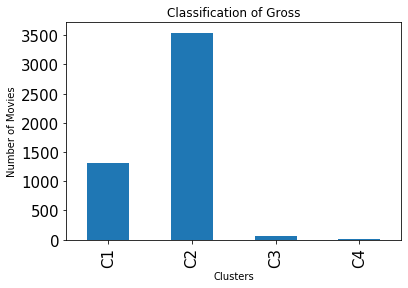

In [18]:
data.groupby(['gross_class']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Clusters')
plt.ylabel('Number of Movies')
plt.title('Classification of Gross')

In [19]:
data['gross_class'].value_counts()

C2    3545
C1    1308
C3      57
C4       6
Name: gross_class, dtype: int64

In [20]:
print(Cat_col)

['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating']


## modifying country feature

In [21]:
#df = data.copy()
#country_stats = df.groupby('country')['country'].agg('count')
#country_stats

In [22]:
#country_stats_less_than_10 = country_stats[country_stats < 10]
#data.country = data.country.apply(lambda x: 'other' if x in country_stats_less_than_10 else x)
#data.country.unique()

countries = ['USA', 'UK']
data['country'] = data['country'].where(data['country'].isin(countries), 'other')
data['country'].value_counts

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<bound method IndexOpsMixin.value_counts of 0         USA
1         USA
2          UK
3         USA
5         USA
        ...  
5035      USA
5036      USA
5037    other
5039      USA
5040      USA
Name: country, Length: 4916, dtype: object>

In [23]:
data['country'].value_counts()

USA      3721
other     762
UK        433
Name: country, dtype: int64

## Label Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list = ['director_name', 'actor_1_name', 
            'actor_2_name', 'actor_3_name', 'genres', 
            'country', 'movie_title']
data[cat_list] = data[cat_list].apply(lambda x:le.fit_transform(x))

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [25]:
data.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,facenumber_in_poster,num_user_for_reviews,country,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,gross_class
0,913,723.0,178.0,0.0,855.0,1364,1000.0,760505847.0,0,255,...,0.0,3054.0,1,237000000.0,2009.0,936.0,7.9,1.78,33000,C4
1,787,302.0,169.0,563.0,1000.0,2156,40000.0,309404152.0,0,943,...,0.0,1238.0,1,300000000.0,2007.0,5000.0,7.1,2.35,0,C3
2,2008,602.0,148.0,0.0,161.0,2422,11000.0,200074175.0,0,336,...,1.0,994.0,0,245000000.0,2015.0,393.0,6.8,2.35,85000,C2
3,370,813.0,164.0,22000.0,23000.0,516,27000.0,448130642.0,0,1899,...,0.0,2701.0,1,250000000.0,2012.0,23000.0,8.5,2.35,164000,C3
5,97,462.0,132.0,475.0,530.0,2480,640.0,73058679.0,0,423,...,1.0,738.0,1,263700000.0,2012.0,632.0,6.6,2.35,24000,C2


3    1299
0    1134
6     970
9     470
4     363
2     251
8     231
7      72
5      70
1      56
Name: genres, dtype: int64

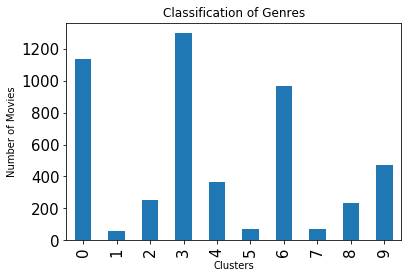

In [26]:
data.groupby(['genres']).size().plot(kind='bar', fontsize=15)
plt.xlabel('Clusters')
plt.ylabel('Number of Movies')
plt.title('Classification of Genres')
data['genres'].value_counts()

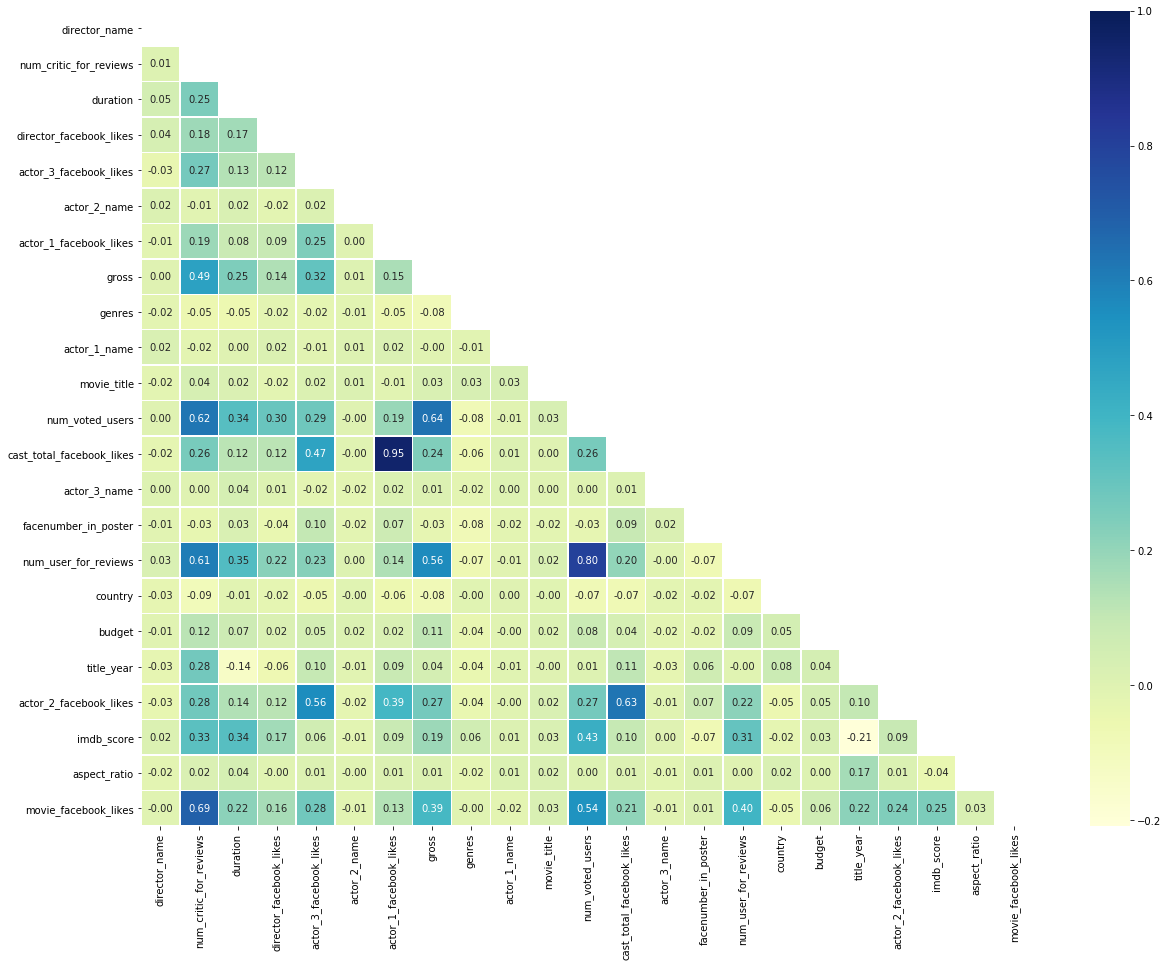

In [27]:
#Finding correlation after encoding
import numpy as np
import seaborn as sns
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, 
            yticklabels=corr.columns, cmap='YlGnBu', linewidth=0.5 , fmt='0.2f',
            annot=True, mask = mask)

In [28]:
# dropping some features due to multicollinearity
data.drop(columns=['movie_facebook_likes'], inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
data.shape

(4916, 23)

## breaking data into target variable and rest features

In [30]:
data.drop('gross', axis=1, inplace=True)
target = data.pop('gross_class')
selected_features = ['num_voted_users', 'duration', 'genres', 
                    'title_year', 'budget','country']
data = data[selected_features]


In [31]:
data

,num_voted_users,duration,genres,title_year,budget,country
0,886204,178.0,0,2009.0,237000000.0,1
1,471220,169.0,0,2007.0,300000000.0,1
2,275868,148.0,0,2015.0,245000000.0,0
3,1144337,164.0,0,2012.0,250000000.0,1
5,212204,132.0,0,2012.0,263700000.0,1
...,...,...,...,...,...,...
5035,36,84.0,4,2005.0,3250.0,1
5036,1338,95.0,3,2011.0,9000.0,1
5037,629,87.0,3,2013.0,20000000.0,2
5039,38,76.0,6,2013.0,1400.0,1


## Scaling data to apply pca

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [33]:
scaled_data = scaler.transform(data)
scaled_data

array([[ 5.73100169,  3.10024926, -1.31767409,  0.52446607,  1.00160031,
        -0.13700749],
       [ 2.76209221,  2.70044097, -1.31767409,  0.36380585,  1.31923295,
        -0.13700749],
       [ 1.36449037,  1.76755496, -1.31767409,  1.00644672,  1.04193461,
        -2.18420753],
       ...,
       [-0.60464501, -0.94225681, -0.27618969,  0.8457865 , -0.09246767,
         1.91019256],
       [-0.60887318, -1.43091139,  0.76529472,  0.8457865 , -0.19329637,
        -0.13700749],
       [-0.60016643, -0.36475594, -0.27618969,  0.76545639, -0.09246767,
        -0.13700749]])

# PCA

In [34]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(scaled_data)

In [35]:
#x_pca = pca.transform(scaled_data)
#print(scaled_data.shape)
#print(x_pca.shape)

In [36]:
#plt.figure(figsize=(8,6))
#plt.scatter(x_pca[:,0], x_pca[:,1], c=target)
#plt.xlabel("First principle component")
#plt.ylabel("Second principle component")

## Train test split

In [37]:
y = target
X = scaled_data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
print(X_train.shape)
print(y_train.shape)

(3932, 6)
(3932,)


## Scaling

In [38]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), 
                  columns=X_train.columns, index=X_train.index)

X_test = pd.DataFrame(scaler.transform(X_test.values), 
                 columns=X_train.columns, index=X_test.index)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nX_train = pd.DataFrame(scaler.fit_transform(X_train.values), \n                  columns=X_train.columns, index=X_train.index)\n\nX_test = pd.DataFrame(scaler.transform(X_test.values), \n                 columns=X_train.columns, index=X_test.index)\n\nfrom sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

# Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

#Training using gini
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 100,
                                 max_depth=3, min_samples_leaf = 5)
clf_gini.fit(X_train, y_train)

#Training using entropy
clf_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 100,
                                 max_depth=3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

### Predictions using gini

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_gini = clf_gini.predict(X_test)

### Reports

In [41]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_gini)) 

print ("Accuracy : ", accuracy_score(y_test,y_pred_gini)*100) 
      
print("Report : ", classification_report(y_test, y_pred_gini))

Confusion Matrix:  [[179  68   0]
 [212 511   0]
 [  0  14   0]]
Accuracy :  70.1219512195122
Report :                precision    recall  f1-score   support

          C1       0.46      0.72      0.56       247
          C2       0.86      0.71      0.78       723
          C3       0.00      0.00      0.00        14

    accuracy                           0.70       984
   macro avg       0.44      0.48      0.45       984
weighted avg       0.75      0.70      0.71       984



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predictions using entropy

In [42]:
y_pred_entropy = clf_entropy.predict(X_test)

### Reports

In [43]:
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred_entropy)) 

print ("Accuracy : ", accuracy_score(y_test,y_pred_entropy)*100) 
      
print("Report : ", classification_report(y_test, y_pred_entropy))

Confusion Matrix:  [[179  68   0]
 [199 524   0]
 [  0  14   0]]
Accuracy :  71.44308943089432
Report :                precision    recall  f1-score   support

          C1       0.47      0.72      0.57       247
          C2       0.86      0.72      0.79       723
          C3       0.00      0.00      0.00        14

    accuracy                           0.71       984
   macro avg       0.45      0.48      0.45       984
weighted avg       0.75      0.71      0.72       984



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_features' : [5],
    'max_depth': [10, 50, 90],
    'random_state' : [0]
}

dtc = DecisionTreeClassifier()

grid_search_dtc = GridSearchCV(estimator = dtc, param_grid = param_grid,
                              cv = 3, n_jobs = -1, verbose = 2)

In [45]:
grid_search_dtc.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 50, 90], 'max_features': [5],
                         'random_state': [0]},
             verbose=2)

In [46]:
y_pred = grid_search_dtc.predict(X_test)

In [47]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred)) 

print ("\n\nAccuracy : ", accuracy_score(y_test,y_pred)*100) 
      
print("\n\nReport : \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[150  97   0]
 [120 600   3]
 [  0  10   4]]


Accuracy :  76.6260162601626


Report : 
               precision    recall  f1-score   support

          C1       0.56      0.61      0.58       247
          C2       0.85      0.83      0.84       723
          C3       0.57      0.29      0.38        14

    accuracy                           0.77       984
   macro avg       0.66      0.57      0.60       984
weighted avg       0.77      0.77      0.77       984



In [50]:
X_test = [[471220,169,0,2007,3000000,0]]
y_pred = grid_search_dtc.predict(X_test)
print(y_pred)

['C3']


In [ ]:
import anvil.server
anvil.server.connect("GQ3FMMXUD5NBMA33DJL2HBJH-RBKCNQPW2QLXYRU3")

@anvil.server.callable
def get_accuracy_xgb_cls():
  # Return a file from this local machine
  return round(accuracy, 2)

@anvil.server.callable
def get_gross_class(pred1):
  # Return a file from this local machine
    votes=pred1[0]
    duration= pred1[1]
    genre=pred1[2]
    year=pred1[3]
    budget=pred1[4]
    country=pred1[5]
    lst=np.array([[votes,duration,genre,year,budget,country]])
    res=grid_search_dtc.predict(lst)
    return res[0]

anvil.server.wait_forever()

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER
